In [1]:
import vice
import arya
import matplotlib.pyplot as plt
import pandas as pd
from surp import ViceModel
import numpy as np

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


## Initial versus final properties

In [2]:
walks_raw = pd.read_csv("../../models/fiducial/run/milkyway_star_migration.dat")

In [3]:
walks_if = pd.read_csv("../../models/fiducial/run/migration_initial_final.dat") # requires a bit of memory
walks_if

,zone,i,n,t,R_birth,R_final,z_birth,z_final
0,0,0,0,0.00,0.084442,0.271235,0.0,-0.074912
1,0,1,0,0.02,0.075795,-0.183429,0.0,-0.227261
2,0,2,0,0.04,0.042057,-0.089587,0.0,0.281916
3,0,3,0,0.06,0.025892,0.018946,0.0,-0.184816
4,0,4,0,0.08,0.051127,-0.139691,0.0,0.494429
...,...,...,...,...,...,...,...,...
134995,199,670,0,13.40,19.926754,18.907950,0.0,-2.579888
134996,199,671,0,13.42,19.966345,20.431651,0.0,2.138520
134997,199,672,0,13.44,19.969133,20.091832,0.0,1.574083
134998,199,673,0,13.46,19.944560,21.349388,0.0,-0.847529


In [4]:
t_end = np.max(walks_if.t)

In [5]:
walks_if["dR"] = walks_if.R_final - walks_if.R_birth
walks_if["dt"] = t_end - walks_if.t

Text(0, 0.5, 'density')

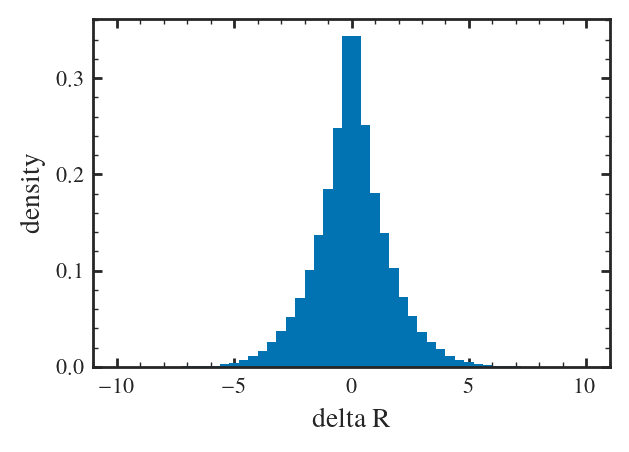

In [7]:

plt.hist(walks_if.dR / walks_if.dt ** 0.33, 
         density=True,
         range=(-10, 10),
        )

plt.xlabel("delta R")
plt.ylabel("density")

Text(0, 0.5, 'density')

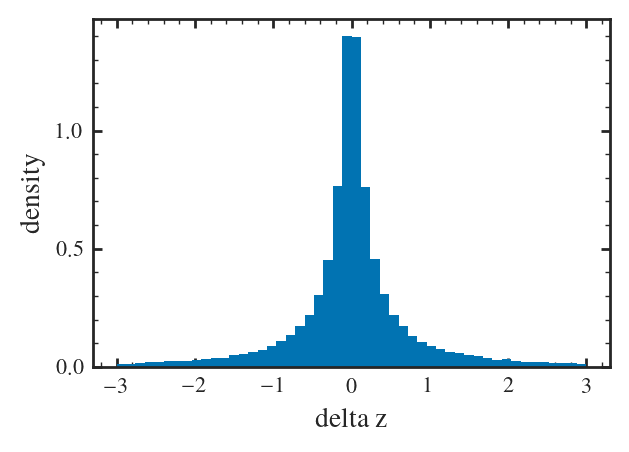

In [8]:

plt.hist(walks_if.z_final / walks_if.dt ** 0.33, 
         density=True,
         range=(-3, 3),
        )

plt.xlabel("delta z")
plt.ylabel("density")

In [9]:
t_end = np.max(walks_if.t)

In [10]:
t_end

np.float64(13.48)

## Checking agains full migration

In [11]:
walks_raw

,zone,time_int,n,time,R,z,bin_id
0,0,0,0,0.00,0.084442,0.000000,0
1,0,0,0,0.02,0.105736,-0.008540,1
2,0,0,0,0.04,0.111271,-0.010760,1
3,0,0,0,0.06,0.115154,-0.012317,1
4,0,0,0,0.08,0.118245,-0.013556,1
...,...,...,...,...,...,...,...
43625995,195,659,0,13.18,19.507896,0.000000,195
43625996,196,659,0,13.18,19.654059,0.000000,196
43625997,197,659,0,13.18,19.704371,0.000000,197
43625998,198,659,0,13.18,19.816554,0.000000,198


In [12]:
walks = walks_raw.set_index(["zone", "time_int"]) # multiindex makes this much easier...
walks.sort_index(inplace=True)

In [13]:
df_end = walks[walks.time == np.max(walks.time)]

In [14]:
df_end

n   time          R         z  bin_id
zone time_int                                       
0    0         0  13.18   0.269748 -0.074316       2
     1         0  13.18   0.181361 -0.225449       1
     2         0  13.18   0.088535  0.279664       0
     3         0  13.18   0.019002 -0.183337       0
     4         0  13.18   0.138162  0.490468       1
...           ..    ...        ...       ...     ...
199  655       0  13.18  19.926049  1.216273     199
     656       0  13.18  18.025078  0.102283     180
     657       0  13.18  18.864106  0.716349     188
     658       0  13.18  19.629863 -0.030391     196
     659       0  13.18  19.922021  0.000000     199

[132000 rows x 5 columns]

In [15]:
Ns = df_end.index.values # last slice contains every value

In [16]:
t_int_end = np.max(walks_raw.time_int)

In [17]:
walks.loc[(1, 250)]

n   time         R         z  bin_id
zone time_int                                      
1    250       0   5.00  0.162051  0.000000       1
     250       0   5.02  0.120908 -0.015860       1
     250       0   5.04  0.110214 -0.019983       1
     250       0   5.06  0.102713 -0.022875       1
     250       0   5.08  0.096741 -0.025177       0
...           ..    ...       ...       ...     ...
     250       0  13.10  0.142349 -0.117346       1
     250       0  13.12  0.142600 -0.117442       1
     250       0  13.14  0.142850 -0.117538       1
     250       0  13.16  0.143099 -0.117635       1
     250       0  13.18  0.143348 -0.117731       1

[410 rows x 5 columns]

In [18]:
walks_raw

,zone,time_int,n,time,R,z,bin_id
0,0,0,0,0.00,0.084442,0.000000,0
1,0,0,0,0.02,0.105736,-0.008540,1
2,0,0,0,0.04,0.111271,-0.010760,1
3,0,0,0,0.06,0.115154,-0.012317,1
4,0,0,0,0.08,0.118245,-0.013556,1
...,...,...,...,...,...,...,...
43625995,195,659,0,13.18,19.507896,0.000000,195
43625996,196,659,0,13.18,19.654059,0.000000,196
43625997,197,659,0,13.18,19.704371,0.000000,197
43625998,198,659,0,13.18,19.816554,0.000000,198


In [19]:
t_end = np.max(walks.time)

In [20]:
Np = len(Ns)
t_birth = np.empty(Np)
Ri = np.zeros(Np)
Rf = np.zeros(Np)
zf = np.zeros(Np)


for n, idx in enumerate(Ns):
    print(f"{n} / {Np}", end="\r")
    ws = walks.loc[idx[0], idx[1]]
    t_birth[n] = ws.time.iloc[0]
    assert ws.time.iloc[-1] == t_end
    Ri[n] = ws.R.iloc[0]
    Rf[n] = ws.R.iloc[-1]
    zf[n] = ws.z.iloc[-1]
    
dR = Rf - Ri

131999 / 132000

In [21]:
σ8 = 2.68

Text(0, 0.5, 'density')

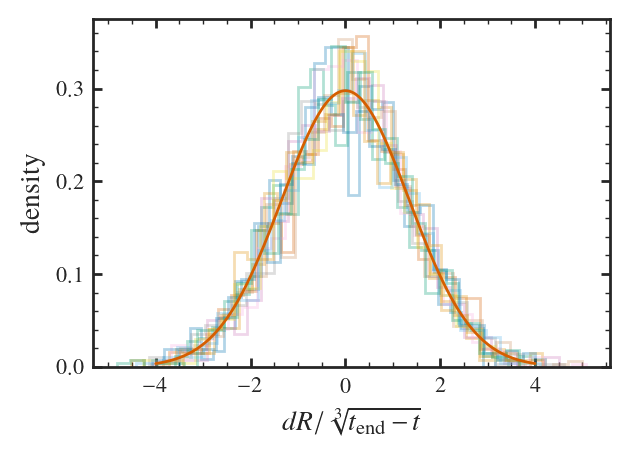

In [22]:
for t in np.arange(0, 13.0):
    dt = 0.5
    filt = t_birth > t - dt
    filt &= t_birth < t + dt
    filt &= Ri > 7
    filt &= Ri < 9
    plt.hist(dR[filt]/np.cbrt(13.2 - t_birth[filt]), 30, histtype="step", density=True, alpha=0.3)
    
x = np.linspace(-4, 4, 1000)
σ = σ8 / np.cbrt(8)
y = 1/np.sqrt(2*np.pi) * 1/σ * np.exp(-x**2 / (2*σ**2))
plt.plot(x, y)
plt.xlabel(r"$dR / \sqrt[3]{t_{\rm  end} - t}$")
plt.ylabel("density")

In [23]:
dz = np.abs(zf)

(-2.0, 2.0)

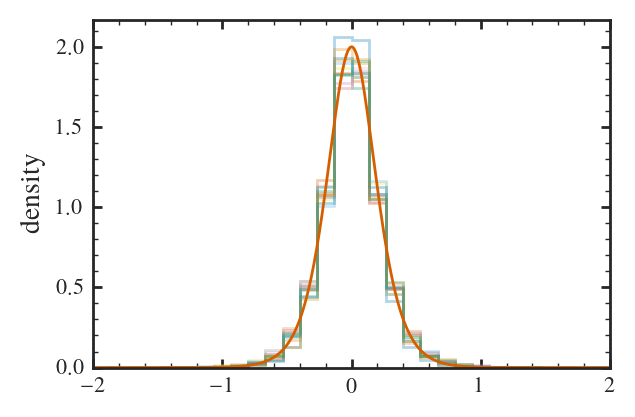

In [32]:
for t in np.arange(0, 13.0):
    dt = 2
    filt = t_birth > t - dt
    filt &= t_birth < t + dt
    filt &= Rf > 7
    filt &= Rf < 9
    delta_t = 13.2 - t
    plt.hist(zf[filt] /np.exp(delta_t / 7), 30, range=(-2, 2), histtype="step", density=True, alpha=0.3)

x_m = np.linspace(-2, 2, 1000)
hz = 0.5
plt.plot(x_m, 1 /hz / np.cosh(x/hz)**2)
plt.ylabel("density")
plt.xlim(-2, 2)

all time bins appear to be well approximated by the gaussian (yay). The overabundance at 0 is likely due to boundry conditions (r=0 and r=20).

Text(0, 0.5, 'dr')

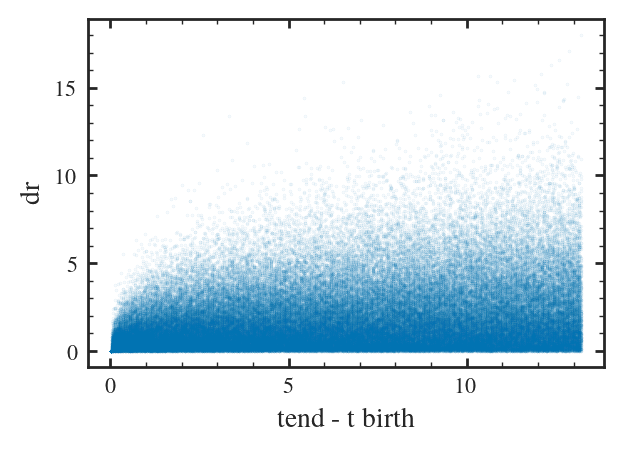

In [25]:
plt.scatter(13.2 - t_birth, np.abs(dR), s=0.05, alpha=0.1)
plt.xlabel("tend - t birth")
plt.ylabel('dr')

In [26]:
z0 = 2
dz = 0.1
filt = Ri > z0 - dz
filt &= Ri <= z0 + dz

In [27]:
idx = Ns[filt]

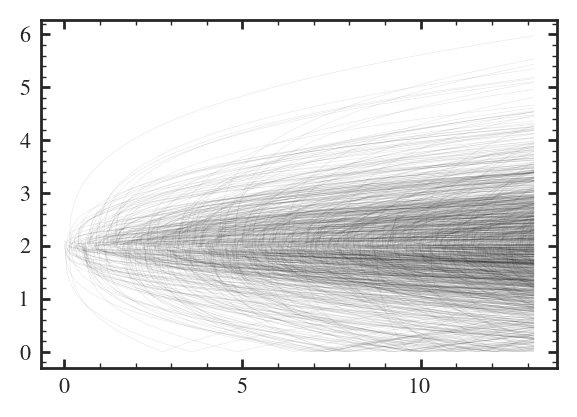

In [28]:
for N in idx:
    w = walks.loc[N[0], N[1]]
    plt.plot(w.time, w.R, lw=0.2, alpha=0.1, color="k")
    


Text(0, 0.5, 'z / kpc')

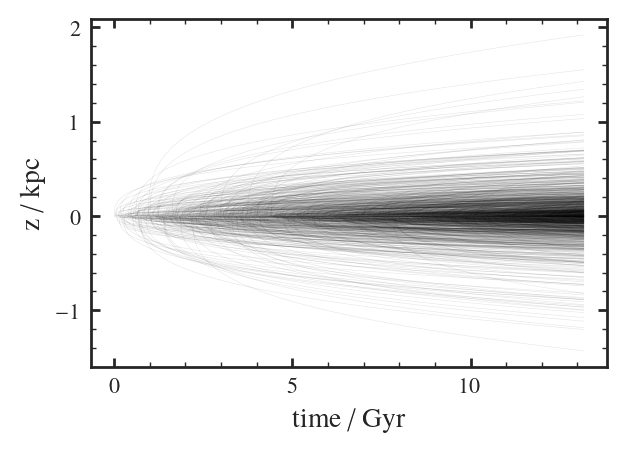

In [29]:
for N in idx:
    w = walks.loc[N[0], N[1]]
    plt.plot(w.time, w.z, lw=0.2, alpha=0.1, color="k")

plt.xlabel("time / Gyr")
plt.ylabel("z / kpc")
